<a href="https://colab.research.google.com/github/mojoyinkimberly/Gender_Classification/blob/main/GenderClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**importing libraries**

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

 **reading dataset into the python environment**

In [277]:
gender_dataset = pd.read_csv("/content/gender_classification_v7.csv",sep = ",")
gender_dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


**A bar chart showing the relationship between gender and long hair.**

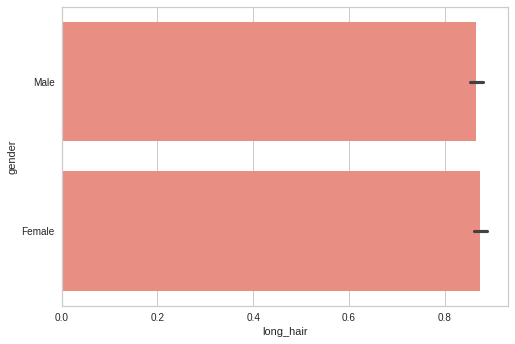

In [278]:
sns.barplot(x = "long_hair", y = "gender", color='salmon', data=gender_dataset)

**A line graph showing the variations between the width and height of the both genders' foreheads**

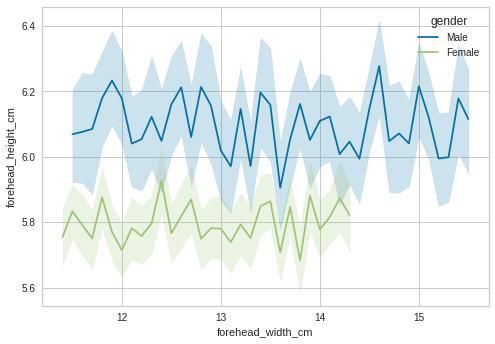

In [279]:
sns.lineplot(x = "forehead_width_cm", y = "forehead_height_cm", hue = "gender", data = gender_dataset)

**A bar graph showing the variations between the length and width of both genders' noses**

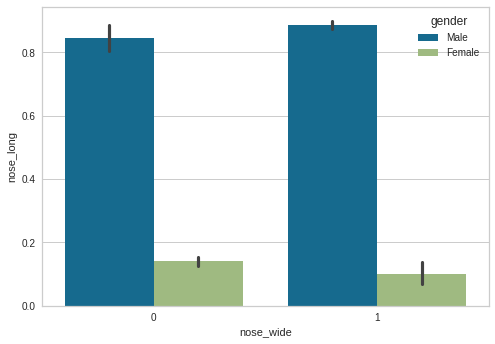

In [280]:
sns.barplot(x = "nose_wide", y = "nose_long", hue = "gender", data = gender_dataset)

**A bar chart showing the thinness of both genders' lips**

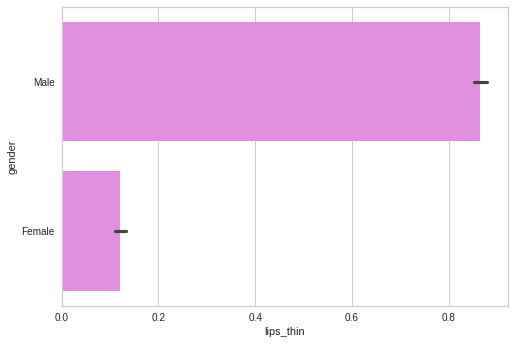

In [281]:
sns.barplot(x = "lips_thin",y = "gender", color = "violet",data = gender_dataset)

**A bar chart showing the distance from nose to lip of both genders**

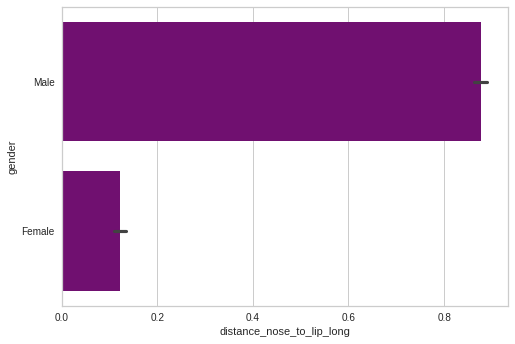

In [282]:
sns.barplot(x="distance_nose_to_lip_long",y = "gender", color = 'purple', data = gender_dataset)

 **Encoding gender column into 1 and 0 for easy model classification**

In [283]:
lst = []

for gender in range(len(gender_dataset['gender'])):
  if gender_dataset['gender'][gender] == 'Male':
    lst.append(1)
  else:
    lst.append(0)

gender_dataset['gender1'] = lst

**dropping unnecessary column**

In [284]:
new_gender_dataset=gender_dataset.drop(columns = ['gender'])

**checking for missing values**

In [285]:
new_gender_dataset.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender1                      0
dtype: int64

**checking for outliers**

In [286]:
new_gender_dataset.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender1
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.49990
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,0.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


**checking the relationships between variables**

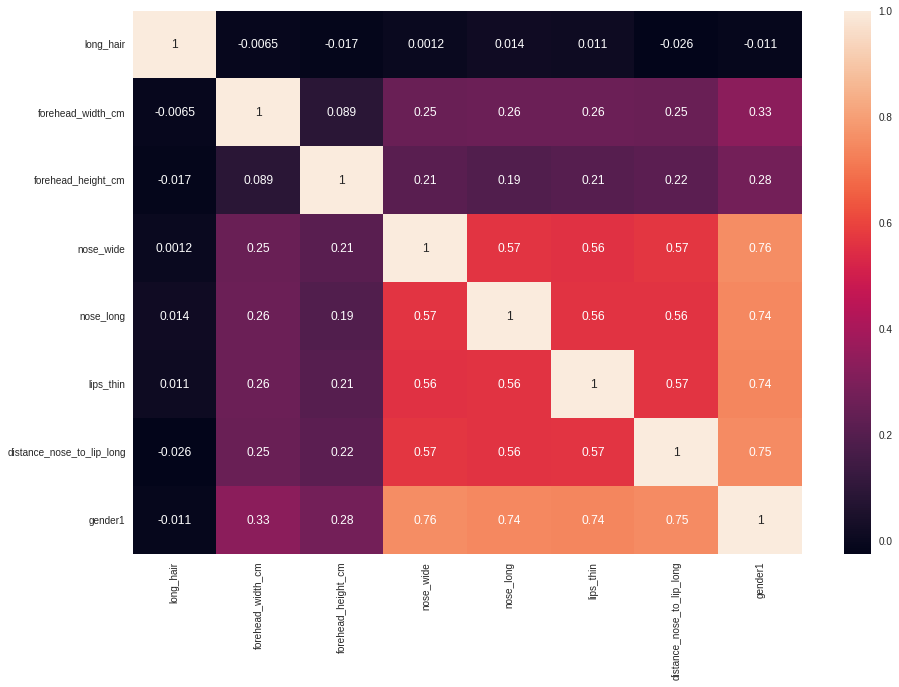

In [287]:
plt.figure(figsize=(15,10))
sns.heatmap(new_gender_dataset.corr(), annot=True)

**splitting variables into dependent and independent variables**

In [288]:
y = new_gender_dataset['gender1']
x = new_gender_dataset.drop(columns= ['gender1'])

**checking for multicolinearity using variance inflation factor**

In [289]:
def calcu_mult(df):
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return vif

In [290]:
calcu_mult(new_gender_dataset)

,variables,VIF
0,long_hair,7.463146
1,forehead_width_cm,75.458615
2,forehead_height_cm,73.721383
3,nose_wide,3.599646
4,nose_long,3.677767
5,lips_thin,3.559920
6,distance_nose_to_lip_long,3.657693


**splitting dataset into train and test**

In [291]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size =.20, random_state = 45)

**normalizing the dataset**

In [292]:
normalizer = MinMaxScaler()
norm_X = pd.DataFrame(normalizer.fit_transform(X_train))

 **splitting the normalized dataset for validation**

In [293]:
X_train_, X_val_test, y_train_, y_val_test = train_test_split(norm_X, y_train, test_size=0.25, random_state=1)

**using the principal component analysis model to check for important features**

In [303]:
pca = PCA(n_components = 7)
pca_model = pca.fit(X_train_)
PCA(n_components = 7)

PCA(n_components=7)

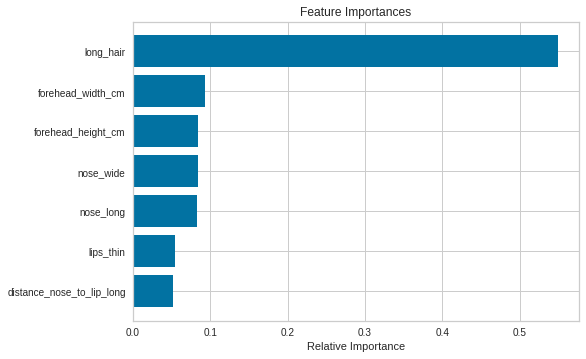

In [304]:
features = new_gender_dataset.columns
importances = pca_model.explained_variance_ratio_
indices = np.argsort(importances)[-7:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**fitting our training dataset into the logistic regression model**

In [305]:
lg_model = LogisticRegression()
lg_result = lg_model.fit(X_train_, y_train_)

**predicting with our test**

In [306]:
y_predict = lg_result.predict(X_val_test)

**using the confusion matrix to get the four quadrants that show the true and false positive and negative classes**

In [307]:
print("cm : ",confusion_matrix(y_val_test, y_predict))

cm :  [[485  17]
 [ 24 474]]


**checking for accuracy score**

In [308]:
print("ac_score : ",accuracy_score(y_val_test, y_predict))

ac_score :  0.959


**using the repeated k fold model to cross validate**

In [309]:
Cv_ = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
score = cross_val_score(lg_result, X_val_test, y_val_test, scoring = "accuracy", cv = Cv_, n_jobs=1, error_score="raise")
np.mean(score)

0.96125

                                                            END OF NOTEBOOK